In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
cv.__version__

'4.5.5'

In [3]:

# # Read input image
# img = cv.imread("test_image/front_1.jpg", cv.IMREAD_GRAYSCALE)
# img = cv.resize(img, [400,400])

# # convert input image to grayscale
# # gray = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# # edges = cv.Canny(img,100,200)

# # read haarcascade for number plate detection
# cascade = cv.CascadeClassifier('haarcascades\haarcascade_russian_plate_number.xml')

# # Detect license number plates
# plates = cascade.detectMultiScale(img, 1.2, 5)
# print('Number of detected license plates:', len(plates))

# # loop over all plates
# for (x,y,w,h) in plates:
   
#    # draw bounding rectangle around the license number plate
#    cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
#    gray_plates = edges[y:y+h, x:x+w]
#    color_plates = img[y:y+h, x:x+w]
   
#    # save number plate detected
#    cv.imwrite('Numberplate.jpg', gray_plates)
#    cv.imshow('Number Plate', gray_plates)
#    cv.imshow('Number Plate Image', img)
#    cv.waitKey(0)
# cv.destroyAllWindows()


In [3]:
import cv2
from PIL import Image, ImageFilter

image = cv2.imread('My_dataset/test_img_raw/6.jpg') # hard [4 40 44 38(stuck) 27 23   ]
image = cv2.resize(image,[500,500])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5,5), 0)
blurred = cv2.GaussianBlur(blurred, (3,3), 0)

# blurred = cv2.GaussianBlur(blurred, (3,3), 0)
# blurred = cv2.GaussianBlur(blurred, (3,3), 0)
# blurred = cv2.GaussianBlur(blurred, (5,5), 0)
# blurred = cv2.GaussianBlur(blurred, (5,5), 0)
# blurred = cv2.GaussianBlur(blurred, (5,5), 0)
# blurred = cv2.GaussianBlur(blurred, (5,5), 0)

blur = cv2.GaussianBlur(gray, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)
# blur_2 = cv2.blur(gray,(5,5))

canny = cv2.Canny(blur, 60, 100)
# canny_2 = cv2.Canny(blur_2, 60, 100)
# cv.imshow('show',canny)
# cv2.waitKey(0)


# Find contours
cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Iterate thorugh contours and draw rectangles around contours
print(f"num of box : {len(cnts)}")
count = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if (w>h) and (1.1<(w/h)<2.2) and (40<h<190):
        count += 1
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    # cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)

print(count)
cv2.imshow('canny', canny)
# cv2.imshow('canny_2', canny_2)

cv2.imshow('image', image)
cv2.imshow("blur",blurred)
cv2.waitKey(0)

num of box : 74
2


-1

In [1]:
from vision_function import local_plate
import cv2 as cv
coor,crop_img,img = local_plate(image_name='My_dataset/test_img_raw/1.jpg', input_form="PATH")

# pure_plate = crop_img[0]
# cv.imwrite("pure_plate_22.jpg", pure_plate)

True

In [9]:
cv.imshow("show",crop_img[0])
cv.waitKey(0)

-1

In [6]:
# from vistion_function import local_plate

In [23]:
import cv2 as cv
#get the number
# pure_plate = cv.imread("pure_plate.jpg")
# pure_plate = cv.imread("crop_real_1.jpg")
pure_plate = cv.imread("crop_real_3.jpg")



pure_plate_char = pure_plate[:int(pure_plate.shape[0]*0.65),:]
threshold_char = pure_plate_char.shape[0]*0.45

pure_plate_province = pure_plate[int(pure_plate.shape[0]*0.65):,:]

# pure_plate = cv.resize(pure_plate,[600,400])
# blurred_pure_plate = cv.GaussianBlur(pure_plate_char, (5,5), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (5,5), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)
# blurred_pure_plate = cv.GaussianBlur(blurred_pure_plate, (3,3), 0)

blurred_pure_plate = cv.GaussianBlur(pure_plate_char, (0,0), sigmaX=2, sigmaY=2, borderType = cv.BORDER_DEFAULT)

canny_blurred_pure_plate = cv.Canny(blurred_pure_plate, 50, 100)
find_front = cv.findContours(canny_blurred_pure_plate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
find_front = find_front[0] if len(find_front) == 2 else find_front[1]
count_pp = 0
keep_coor_raw = []
keep_coor = []
for i in find_front:
    x,y,w,h = cv.boundingRect(i)
    if (h>w)and(h>threshold_char)and((h/w)<5):
        count_pp += 1  
        keep_coor_raw.append([x,y,w,h])
        # cv.rectangle(pure_plate_char, (x, y), (x + w, y + h), (36,255,12), 2)
keep_coor_raw.sort()
if (len(keep_coor_raw)>=1):
    keep_coor.append(keep_coor_raw[0])
    for i in range(len(keep_coor_raw)-1):
        i = i+1
        if ((keep_coor_raw[i][0]-keep_coor_raw[i-1][0]) < 7 ):  # if it close togather
            if (keep_coor_raw[i][2]>keep_coor_raw[i-1][2]):   # if it more wide
                keep_coor[i-1] = keep_coor_raw[i]
        else : keep_coor.append(keep_coor_raw[i])
for i in keep_coor:
    cv.rectangle(pure_plate_char, (i[0], i[1]), (i[0] + i[2], i[1] + i[3]), (36,255,12), 2)


cv.imshow("show_char",pure_plate_char)
cv.imshow("show_province",pure_plate_province)
cv.waitKey(0)

pure_plate.shape


(100, 182, 3)

In [3]:
keep = [0,1,2,3]
keep[0] = 1
keep

[1, 1, 2, 3]

In [4]:
import tensorflow as tf
import tensorflow.keras.layers as nn
mlpc = tf.keras.Sequential([
    # nn.Rescaling(scale=1./255, offset=0.0),
    nn.Conv2D(filters=32, kernel_size = (10,10), activation='relu', input_shape=(100, 200, 1)),
    nn.Conv2D(filters=16, kernel_size = (5,5), activation='relu'),
    nn.MaxPool2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None),
    nn.Flatten(),
    nn.Dense(30,activation='relu'),
    nn.Dense(10,activation="relu"),
    nn.Dense(1)
])
mlpc.load_weights("weight/clp/weight")
# new_model = tf.keras.models.load_model("correct_lisense_plate_model\savemodel")
# new_model = tf.keras.models.load_model('saved_model/my_model')


ModuleNotFoundError: No module named 'tensorflow.tsl'

In [ ]:
def process_img(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    tensor = tf.constant(gray/255)
    tensor = tf.reshape(tensor, (tensor.shape[0],tensor.shape[1],1), name=None)
    tensor = tf.image.resize(tensor,(100,200))
    tensor = tf.expand_dims(tensor,axis=0)
    return tensor


TensorShape([1, 100, 200, 1])

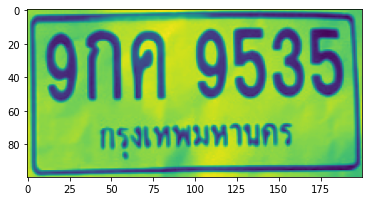

In [46]:
img = cv.imread("crop_real_3.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tensor = tf.constant(gray/255)
tensor = tf.reshape(tensor, (tensor.shape[0],tensor.shape[1],1), name=None)
tensor = tf.image.resize(tensor,(100,200))
tensor = tf.expand_dims(tensor,axis=0)
plt.imshow(tensor)
tensor = tf.expand_dims(tensor,axis=0)
tensor.shape

In [49]:
mlpc.predict(tensor)[0][0]

0.75269896

In [ ]:
import cv2

model_path = "savedmodel_lisense_plate/saved_model.pb"
# config_path = "/path/to/model.pbtxt"  # Optional, if using a .pbtxt file

net = cv2.dnn.readNetFromTensorflow(model_path, c)